In [1]:
import random
import math
import csv
import time
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from multiprocessing import Pool
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score,top_k_accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.calibration import CalibratedClassifierCV
from sklearn.multioutput import MultiOutputRegressor
from joblib import dump, load
from helper_func import analysis_func_expnum,analysis_func_layers,analysis_func_noise,perform_plot
from functools import partial

### Test effect of number of simulation on MAE, MSE and training time

In [7]:
num_exprs=[100,250,500,1000,2500,5000,10000,25000,50000,100000]
noise=0.01

#Define final SVC
model_single=SVR(kernel= 'rbf',C= 0.125,epsilon= 0.0125,gamma= 'scale')
model = MultiOutputRegressor(model_single)
    

In [8]:
analysis_partial=partial(analysis_func_expnum,model=model,noise=noise)
p = Pool(processes=len(num_exprs))
results = p.map(analysis_partial, num_exprs)
p.close()
print(results)


[(100, 0.006002664566040039, 0.0009970664978027344, 0.044790345558693115, 0.14594491417296812, 0.1786426235257069, 0.33314212203653426), (250, 0.016000747680664062, 0.0029997825622558594, 0.02299347389202872, 0.10091856132092823, 0.12454488071773846, 0.27362638109415605), (500, 0.05300092697143555, 0.012000322341918945, 0.01754025292972539, 0.07135182113624877, 0.11073193278561273, 0.22411590495761605), (1000, 0.15600872039794922, 0.03100109100341797, 0.010252493763735913, 0.07950916171668389, 0.08068783860334147, 0.2287965001358375), (2500, 0.9490013122558594, 0.21801161766052246, 0.007633910050403626, 0.07850521797181002, 0.06829591697988871, 0.23648517041554484), (5000, 6.458013534545898, 1.0580031871795654, 0.008913234855554605, 0.07940403744174453, 0.07332942312746281, 0.23660183321730102), (10000, 26.605008363723755, 3.6310009956359863, 0.00852345795283808, 0.07221311805460241, 0.07277417099960924, 0.2253956668536785), (25000, 215.9981291294098, 21.658803462982178, 0.008774446384

In [9]:
#Save results
dump(results, 'svm_number_of_sims_results.joblib')


['svm_number_of_sims_results.joblib']

In [2]:
#Load results
results=load('models/svm_number_of_sims_results.joblib')
df_num_exp = pd.DataFrame.from_records(
    results, columns=['Number of Experiments', "Fitting Time (sec)","Prediction Time (sec)","MSE Diameter","MSE SD","MAE Diameter","MAE SD"])

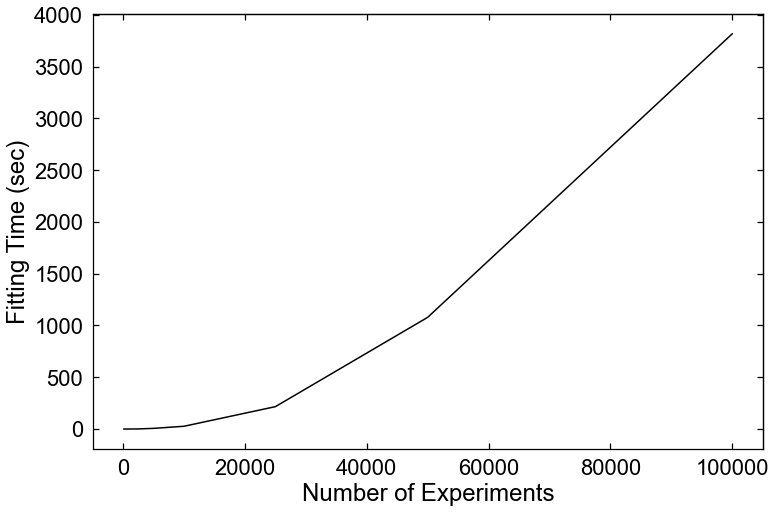

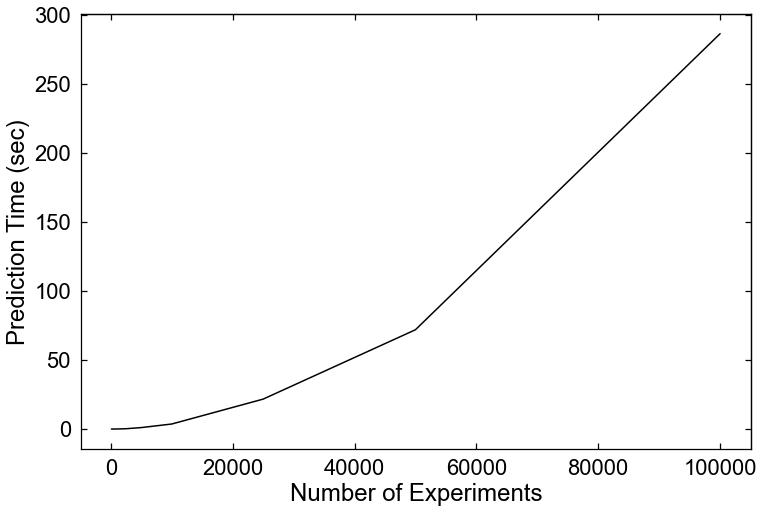

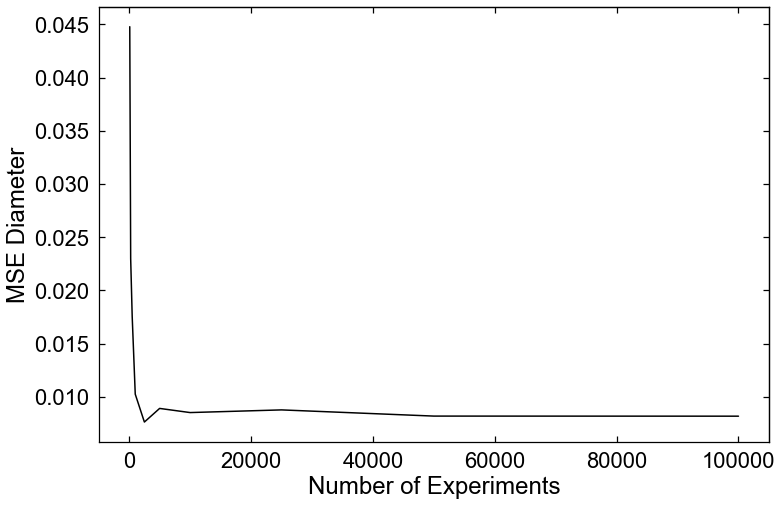

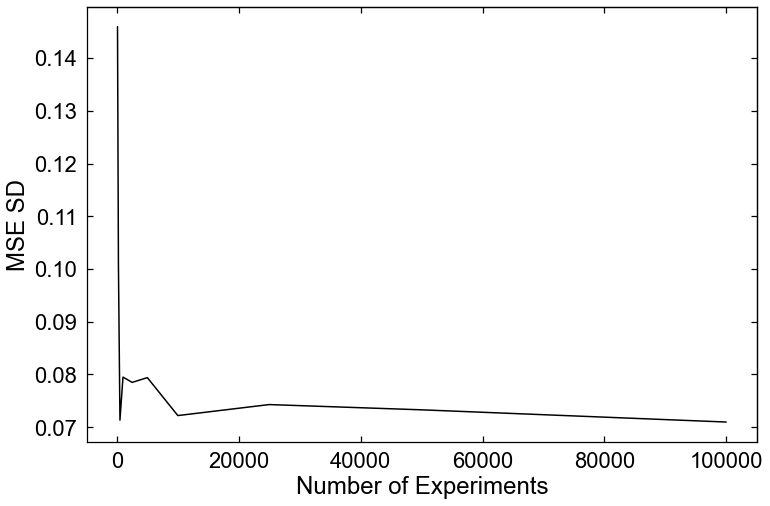

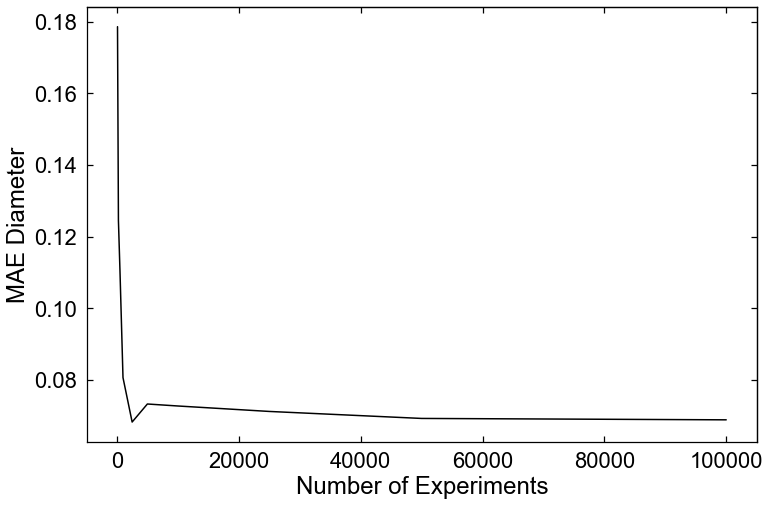

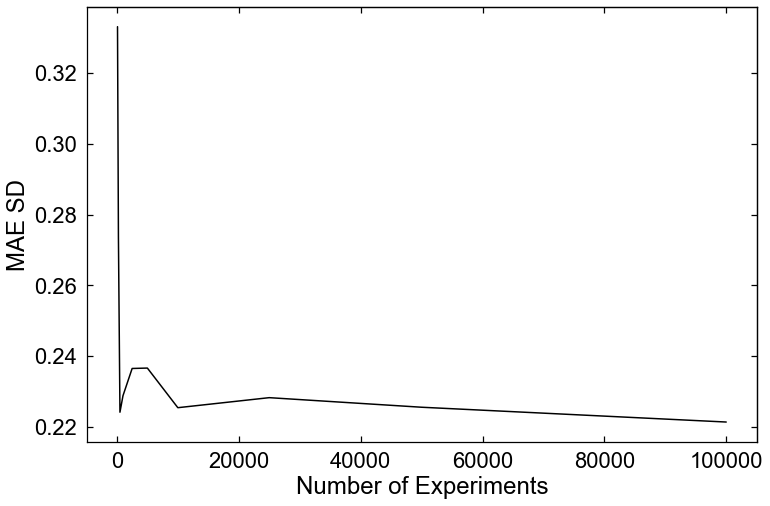

In [3]:
perform_plot(df_num_exp)

### Test effect of signal's noise on MAE and MSE

In [12]:
num_exprs=10000
noise=[0.001,0.0025,0.005,0.01,0.025,0.05,0.1,0.25,0.5]
#Define final SVC
model_single=SVR(kernel= 'rbf',C= 0.125,epsilon= 0.0125,gamma= 'scale')
model = MultiOutputRegressor(model_single)

In [13]:
analysis_partial=partial(analysis_func_noise,model=model,exp=num_exprs)
p = Pool(processes=len(noise))
results = p.map(analysis_partial, noise)
p.close()
print(results)

[(0.001, 63.373679399490356, 6.100076913833618, 0.006705180377006865, 0.05064668527549494, 0.06516454575004178, 0.1831041747015068), (0.0025, 63.170666456222534, 6.513074159622192, 0.007140875037762568, 0.06639529266564151, 0.06628053806365934, 0.2145738193467305), (0.005, 62.74967813491821, 6.5160722732543945, 0.007435045618945694, 0.0682962129509062, 0.06717815292070256, 0.21677929561842546), (0.01, 62.84968137741089, 6.245076417922974, 0.00852345795283808, 0.07221311805460241, 0.07277417099960924, 0.2253956668536785), (0.025, 62.89365911483765, 6.5340752601623535, 0.0119989615727363, 0.0807215308215969, 0.08266098869713191, 0.23955134619509347), (0.05, 63.37568473815918, 6.468060731887817, 0.0187551963395047, 0.0802470451381203, 0.10007982186657695, 0.24050927301937877), (0.1, 63.2616708278656, 6.429076194763184, 0.021941060309774246, 0.08609993179053269, 0.10834059249860906, 0.25032288240560013), (0.25, 63.07968091964722, 6.418071985244751, 0.02180419517404779, 0.08898819323744984,

In [14]:
#Save results
dump(results, 'svm_noise_results.joblib')


['svm_noise_results.joblib']

In [4]:
#Load results
results=load('models/svm_noise_results.joblib')
df_noise = pd.DataFrame.from_records(
    results, columns=["Noise %", "Fitting Time (sec)","Prediction Time (sec)","MSE Diameter","MSE SD","MAE Diameter","MAE SD"])
df_noise["Noise %"]=df_noise["Noise %"]*100

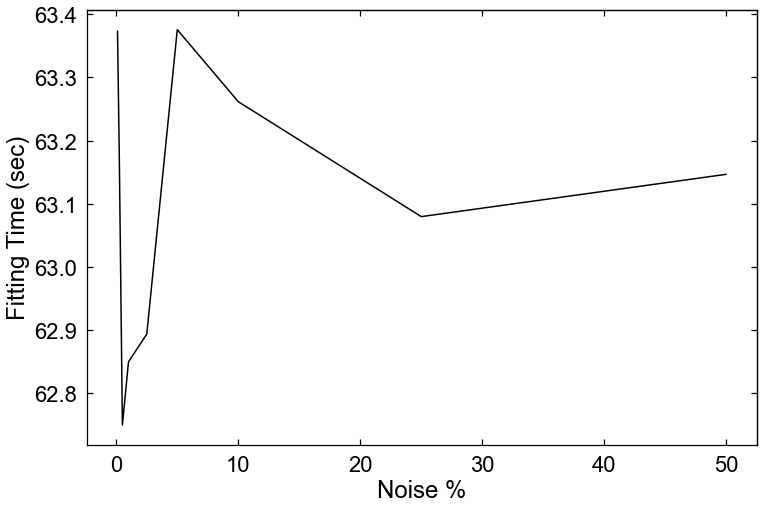

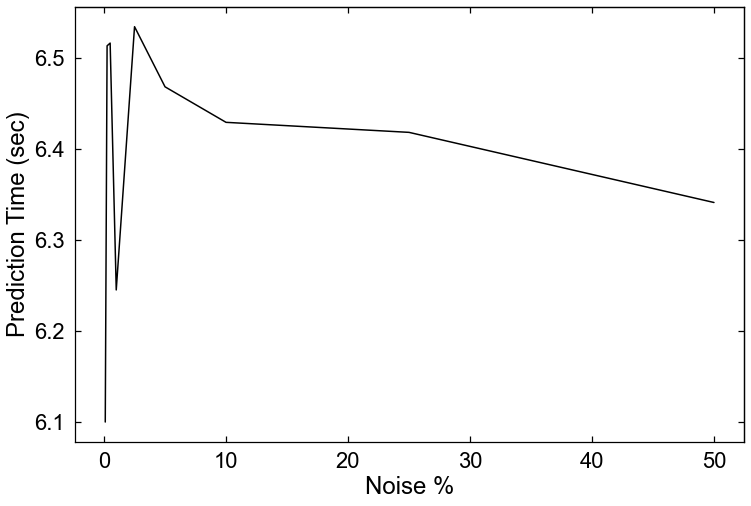

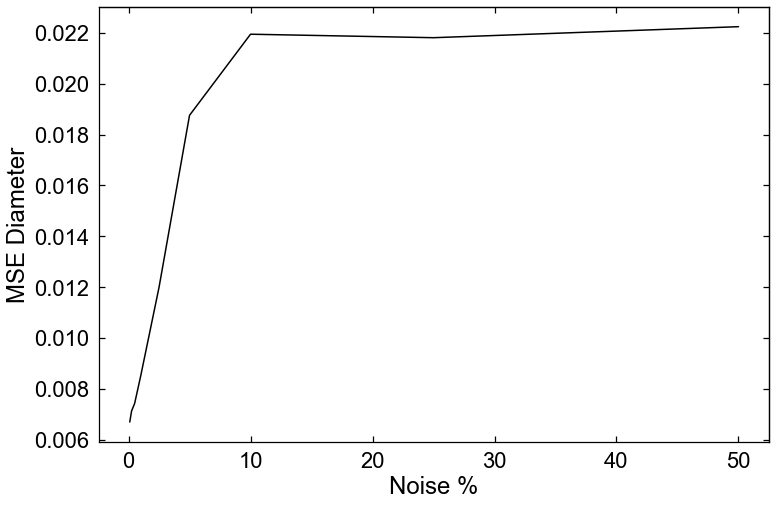

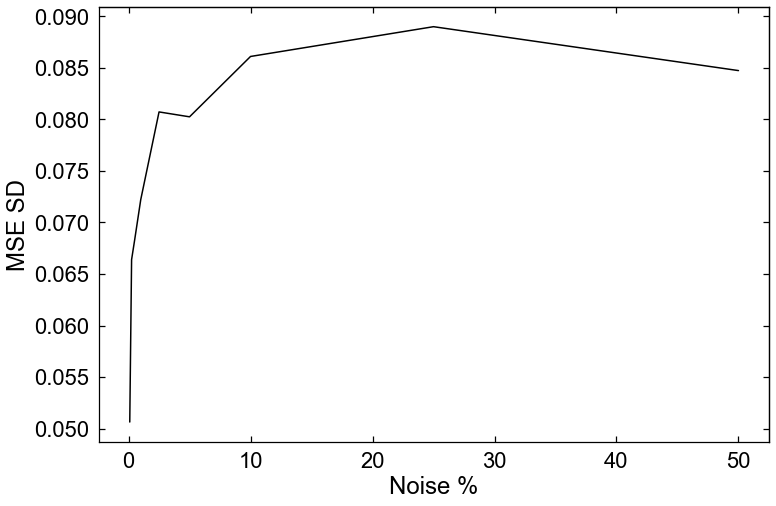

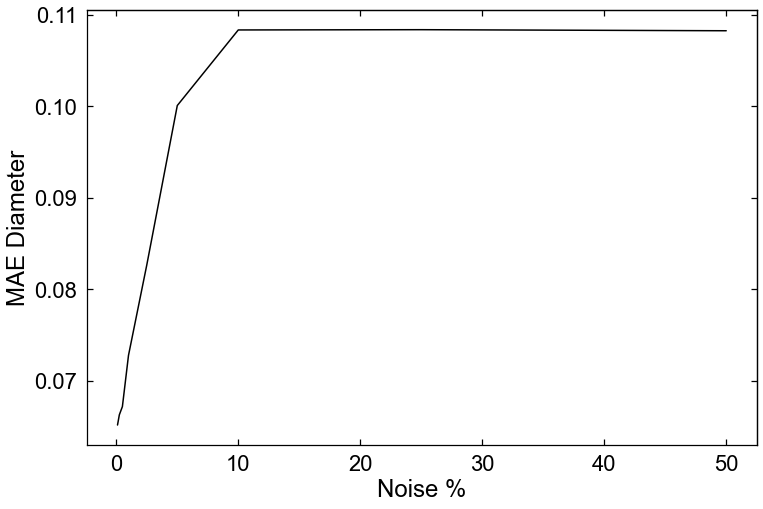

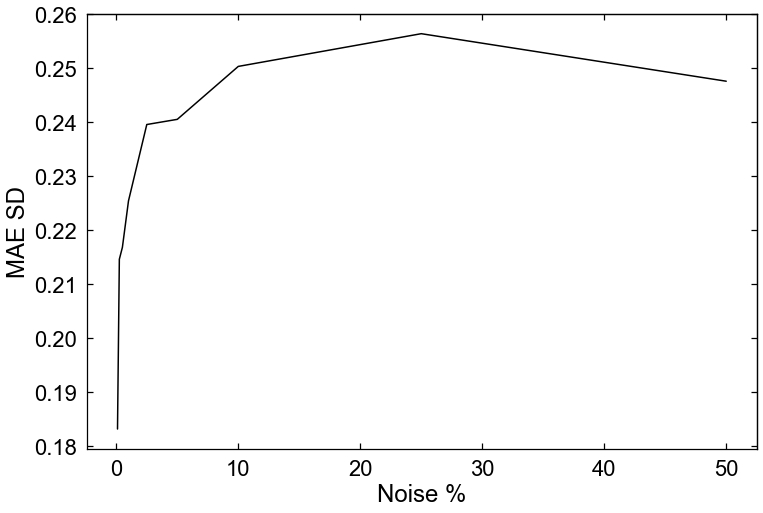

In [5]:
perform_plot(df_noise)